<a href="https://colab.research.google.com/github/AnaChavezHdz/Comulative-distributio-function/blob/main/Comulative_distribution_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from scipy.spatial.distance import pdist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Leer bases de datos

In [ ]:
# For database in .csv
subset_a = pd.read_csv("https://raw.githubusercontent.com/AnaChavezHdz/Natural-products-subsets-generation/main/DATA%20SETS/UNPD_subset_A_14994_curada_NPL_score.csv")
subset_b = pd.read_csv("https://raw.githubusercontent.com/AnaChavezHdz/Natural-products-subsets-generation/main/DATA%20SETS/UNPD_subset_B_7497_curada_NPL_score.csv")
subset_c = pd.read_csv("https://raw.githubusercontent.com/AnaChavezHdz/Natural-products-subsets-generation/main/DATA%20SETS/UNPD_subset_C_4998_curada_NPL_score.csv")
REAL_Enamine_subset = pd.read_csv("/content/drive/MyDrive/HANNA_molecular_fingerprint/Natural products subsets/REAL_subset_3809_curada_NPL_score.csv")

In [ ]:
subset_a = subset_a[['SMILES_chiral']]
subset_b = subset_b[['SMILES_chiral']]
subset_c = subset_c[['SMILES_chiral']]
REAL_Enamine_subset = REAL_Enamine_subset[['SMILES_chiral']]

In [ ]:
print(subset_b.columns)

Index(['SMILES_chiral'], dtype='object')


In [ ]:
subset_a = subset_a.head(1000)
subset_b = subset_b.head(1000)
subset_c = subset_c.head(1000)
REAL_Enamine_subset = REAL_Enamine_subset.head(1000)

In [ ]:
smi_a = list(subset_a["SMILES_chiral"])
smi_b = list(subset_b["SMILES_chiral"])
smi_c = list(subset_c["SMILES_chiral"])
REAL_smi = list(REAL_Enamine_subset["SMILES_chiral"])

In [ ]:
len(smi_c)

1000

### 2. Definir función

In [ ]:
def ECFP (smi, r):
    fps = pd.DataFrame([[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), r, nBits=1024).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(1024)]], metric="jaccard") # Similarity Matrix
    #print(SimMat.shape)
    #SimMat = round(np.median(SimMat), 3)
    return SimMat

In [ ]:
def MACCSkeys_fp (smi):
    fps = pd.DataFrame([[int(y) for y in MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(167)]], metric="jaccard") # Similarity Matrix
    #print(SimMat.shape)
    #SimMat = round(np.median(SimMat), 3)
    return SimMat

### 3. Sort data

In [ ]:
# sort the data
SimMatECFP4_subset_a_sorted = np.sort(ECFP(smi_a, 2))
SimMatECFP4_subset_b_sorted = np.sort(ECFP(smi_b, 2))
SimMatECFP4_subset_c_sorted = np.sort(ECFP(smi_c, 2))
SimMatECFP4_REAL_sorted = np.sort(ECFP(REAL_smi, 2))
print(SimMatECFP4_subset_a_sorted.shape)
print(SimMatECFP4_subset_b_sorted.shape)
print(SimMatECFP4_subset_c_sorted.shape)
print(SimMatECFP4_REAL_sorted.shape)

(499500,)
(499500,)
(499500,)
(499500,)


In [ ]:
SimMatECFP4_subset_a_sorted

array([0.        , 0.        , 0.        , ..., 0.92156863, 0.92857143,
       1.        ])

In [ ]:
# sort the data
SimMatECFP6_subset_a_sorted = np.sort(ECFP(smi_a, 3))
SimMatECFP6_subset_b_sorted = np.sort(ECFP(smi_b, 3))
SimMatECFP6_subset_c_sorted = np.sort(ECFP(smi_c, 3))
SimMatECFP6_REAL_sorted = np.sort(ECFP(REAL_smi, 3))
print(SimMatECFP6_subset_a_sorted.shape)
print(SimMatECFP6_subset_b_sorted.shape)
print(SimMatECFP6_subset_c_sorted.shape)
print(SimMatECFP6_REAL_sorted.shape)

(499500,)
(499500,)
(499500,)
(499500,)


In [ ]:
# sort the data
SimMatMACCSkeys_subset_a_sorted = np.sort(MACCSkeys_fp(smi_a))
SimMatMACCSkeys_subset_b_sorted = np.sort(MACCSkeys_fp(smi_b))
SimMatMACCSkeys_subset_c_sorted = np.sort(MACCSkeys_fp(smi_c))
SimMatMACCSkeys_REAL_sorted = np.sort(MACCSkeys_fp(REAL_smi))
print(SimMatMACCSkeys_subset_a_sorted.shape)
print(SimMatMACCSkeys_subset_b_sorted.shape)
print(SimMatMACCSkeys_subset_c_sorted.shape)
print(SimMatMACCSkeys_REAL_sorted.shape)

(499500,)
(499500,)
(499500,)
(499500,)


### 4. Definir estadísticos

In [ ]:
data = [SimMatECFP4_subset_a_sorted,
        SimMatECFP4_subset_b_sorted,
        SimMatECFP4_subset_c_sorted,
        SimMatECFP4_REAL_sorted,
        SimMatECFP6_subset_a_sorted,
        SimMatECFP6_subset_b_sorted,
        SimMatECFP6_subset_c_sorted,
        SimMatECFP6_REAL_sorted,
        SimMatMACCSkeys_subset_a_sorted,
        SimMatMACCSkeys_subset_b_sorted,
        SimMatMACCSkeys_subset_c_sorted,
        SimMatMACCSkeys_REAL_sorted]
columns = ["ECFP4_subset_a",
        "ECFP4_subset_b",
        "ECFP4_subset_c",
        "ECFP4_REAL_subset",
        "ECFP6_subset_a",
        "ECFP6_subset_b",
        "ECFP6_subset_c",
        "ECFP6_REAL_subset",
        "MACCSkeys_subset_a",
        "MACCSkeys_subset_b",
        "MACCSkeys_subset_c",
        "MACCSkeys_REAL_subset",]

In [ ]:
data = np.transpose(data)
data = pd.DataFrame(data, columns=columns)
data.tail(2)

,ECFP4_subset_a,ECFP4_subset_b,ECFP4_subset_c,ECFP4_REAL_subset,ECFP6_subset_a,ECFP6_subset_b,ECFP6_subset_c,ECFP6_REAL_subset,MACCSkeys_subset_a,MACCSkeys_subset_b,MACCSkeys_subset_c,MACCSkeys_REAL_subset
499498,0.928571,1.0,1.0,0.633333,0.885714,1.0,1.0,0.562500,1.0,1.0,1.0,0.96875
499499,1.000000,1.0,1.0,0.647059,1.000000,1.0,1.0,0.583333,1.0,1.0,1.0,1.00000


In [ ]:
data = data.describe()
data = data.round(3)
data

,ECFP4_subset_a,ECFP4_subset_b,ECFP4_subset_c,ECFP4_REAL_subset,ECFP6_subset_a,ECFP6_subset_b,ECFP6_subset_c,ECFP6_REAL_subset,MACCSkeys_subset_a,MACCSkeys_subset_b,MACCSkeys_subset_c,MACCSkeys_REAL_subset
count,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000
mean,0.116,0.100,0.087,0.087,0.095,0.082,0.072,0.077,0.413,0.353,0.270,0.362
std,0.054,0.065,0.067,0.051,0.041,0.050,0.051,0.040,0.164,0.197,0.178,0.134
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.080,0.059,0.042,0.049,0.068,0.051,0.038,0.048,0.298,0.208,0.133,0.266
50%,0.110,0.094,0.074,0.083,0.092,0.079,0.063,0.074,0.407,0.348,0.235,0.357
75%,0.144,0.131,0.118,0.120,0.117,0.107,0.096,0.102,0.523,0.487,0.380,0.452
max,1.000,1.000,1.000,0.647,1.000,1.000,1.000,0.583,1.000,1.000,1.000,1.000


In [ ]:
data.to_csv("my_description.csv", index=True)

In [ ]:
describe= pd.read_csv("/content/my_description.csv")
describe.columns = ['Stadistics', 'ECFP4_subset_a', 'ECFP4_subset_b', 'ECFP4_subset_c',"ECFP4_REAL_subset",
       'ECFP6_subset_a', 'ECFP6_subset_b', 'ECFP6_subset_c',"ECFP6_REAL_subset",
       'MACCSkeys_subset_a', 'MACCSkeys_subset_b', 'MACCSkeys_subset_c', "MACCSkeys_REAL_subset"]
describe

,Stadistics,ECFP4_subset_a,ECFP4_subset_b,ECFP4_subset_c,ECFP4_REAL_subset,ECFP6_subset_a,ECFP6_subset_b,ECFP6_subset_c,ECFP6_REAL_subset,MACCSkeys_subset_a,MACCSkeys_subset_b,MACCSkeys_subset_c,MACCSkeys_REAL_subset
0,count,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000
1,mean,0.116,0.100,0.087,0.087,0.095,0.082,0.072,0.077,0.413,0.353,0.270,0.362
2,std,0.054,0.065,0.067,0.051,0.041,0.050,0.051,0.040,0.164,0.197,0.178,0.134
3,min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,25%,0.080,0.059,0.042,0.049,0.068,0.051,0.038,0.048,0.298,0.208,0.133,0.266
5,50%,0.110,0.094,0.074,0.083,0.092,0.079,0.063,0.074,0.407,0.348,0.235,0.357
6,75%,0.144,0.131,0.118,0.120,0.117,0.107,0.096,0.102,0.523,0.487,0.380,0.452
7,max,1.000,1.000,1.000,0.647,1.000,1.000,1.000,0.583,1.000,1.000,1.000,1.000


In [ ]:
std = list(describe["Stadistics"])

In [ ]:
arr = describe.to_numpy()
print(arr.shape)
arr = np.transpose(arr)
print(arr.shape)

(8, 13)
(13, 8)


In [ ]:
df = pd.DataFrame(arr, columns=std)
df

,count,mean,std,min,25%,50%,75%,max
0,count,mean,std,min,25%,50%,75%,max
1,499500.0,0.116,0.054,0.0,0.08,0.11,0.144,1.0
2,499500.0,0.1,0.065,0.0,0.059,0.094,0.131,1.0
3,499500.0,0.087,0.067,0.0,0.042,0.074,0.118,1.0
4,499500.0,0.087,0.051,0.0,0.049,0.083,0.12,0.647
5,499500.0,0.095,0.041,0.0,0.068,0.092,0.117,1.0
6,499500.0,0.082,0.05,0.0,0.051,0.079,0.107,1.0
7,499500.0,0.072,0.051,0.0,0.038,0.063,0.096,1.0
8,499500.0,0.077,0.04,0.0,0.048,0.074,0.102,0.583
9,499500.0,0.413,0.164,0.0,0.298,0.407,0.523,1.0


In [ ]:
df2 = df.iloc[1:]
df2 = df2.reset_index(drop=True)
df2

,count,mean,std,min,25%,50%,75%,max
0,499500.0,0.116,0.054,0.0,0.08,0.11,0.144,1.0
1,499500.0,0.1,0.065,0.0,0.059,0.094,0.131,1.0
2,499500.0,0.087,0.067,0.0,0.042,0.074,0.118,1.0
3,499500.0,0.087,0.051,0.0,0.049,0.083,0.12,0.647
4,499500.0,0.095,0.041,0.0,0.068,0.092,0.117,1.0
5,499500.0,0.082,0.05,0.0,0.051,0.079,0.107,1.0
6,499500.0,0.072,0.051,0.0,0.038,0.063,0.096,1.0
7,499500.0,0.077,0.04,0.0,0.048,0.074,0.102,0.583
8,499500.0,0.413,0.164,0.0,0.298,0.407,0.523,1.0
9,499500.0,0.353,0.197,0.0,0.208,0.348,0.487,1.0


In [ ]:
df2["data set"] = ['ECFP4_subset_a', 'ECFP4_subset_b', 'ECFP4_subset_c', "ECFP4_REAL_subset",
                  'ECFP6_subset_a', 'ECFP6_subset_b', 'ECFP6_subset_c', "ECFP6_REAL_subset",
                  'MACCSkeys_subset_a', 'MACCSkeys_subset_b', 'MACCSkeys_subset_c', "MACCSkeys_REAL_subset"]

In [ ]:
df2

,count,mean,std,min,25%,50%,75%,max,data set
0,499500.0,0.116,0.054,0.0,0.08,0.11,0.144,1.0,ECFP4_subset_a
1,499500.0,0.1,0.065,0.0,0.059,0.094,0.131,1.0,ECFP4_subset_b
2,499500.0,0.087,0.067,0.0,0.042,0.074,0.118,1.0,ECFP4_subset_c
3,499500.0,0.087,0.051,0.0,0.049,0.083,0.12,0.647,ECFP4_REAL_subset
4,499500.0,0.095,0.041,0.0,0.068,0.092,0.117,1.0,ECFP6_subset_a
5,499500.0,0.082,0.05,0.0,0.051,0.079,0.107,1.0,ECFP6_subset_b
6,499500.0,0.072,0.051,0.0,0.038,0.063,0.096,1.0,ECFP6_subset_c
7,499500.0,0.077,0.04,0.0,0.048,0.074,0.102,0.583,ECFP6_REAL_subset
8,499500.0,0.413,0.164,0.0,0.298,0.407,0.523,1.0,MACCSkeys_subset_a
9,499500.0,0.353,0.197,0.0,0.208,0.348,0.487,1.0,MACCSkeys_subset_b


In [ ]:
# calculate the proportional values of samples for ECFP4 y ECFP6
proportionECFP_A = 1. * np.arange(len(SimMatECFP4_subset_a_sorted)) / (len(SimMatECFP4_subset_a_sorted) - 1)
print(len(proportionECFP_A))
proportionECFP_B = 1. * np.arange(len(SimMatECFP4_subset_b_sorted)) / (len(SimMatECFP4_subset_b_sorted) - 1)
print(len(proportionECFP_B))
proportionECFP_C = 1. * np.arange(len(SimMatECFP4_subset_c_sorted)) / (len(SimMatECFP4_subset_c_sorted) - 1)
print(len(proportionECFP_C))
proportionECFP_REAL = 1. * np.arange(len(SimMatECFP4_REAL_sorted)) / (len(SimMatECFP4_REAL_sorted) - 1)
print(len(proportionECFP_REAL))
# calculate the proportional values of samples Ffor MACCS keys
proportionMACCSkeys_A = 1. * np.arange(len(SimMatMACCSkeys_subset_a_sorted)) / (len(SimMatMACCSkeys_subset_a_sorted) - 1)
print(len(proportionMACCSkeys_A))
proportionMACCSkeys_B = 1. * np.arange(len(SimMatMACCSkeys_subset_b_sorted)) / (len(SimMatMACCSkeys_subset_b_sorted) - 1)
print(len(proportionMACCSkeys_B))
proportionMACCSkeys_C = 1. * np.arange(len(SimMatMACCSkeys_subset_c_sorted)) / (len(SimMatMACCSkeys_subset_c_sorted) - 1)
print(len(proportionMACCSkeys_C))
proportionMACCSkeys_REAL = 1. * np.arange(len(SimMatMACCSkeys_REAL_sorted)) / (len(SimMatMACCSkeys_REAL_sorted) - 1)
print(len(proportionMACCSkeys_REAL))

499500
499500
499500
499500
499500
499500
499500
499500


### Plot cumaltive distribution function

<ipython-input-104-8c522ff7dc7c>:34: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc='best', fontsize=10)


Mounted at /content/drive


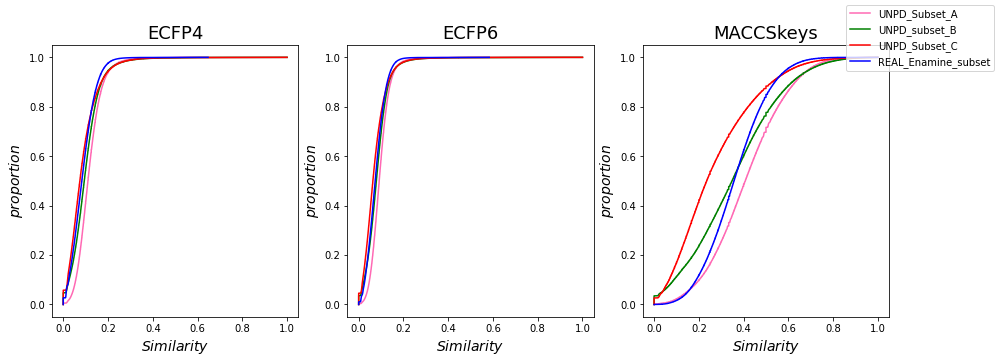

In [ ]:
# plot the sorted data:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(131)
ax1.plot(SimMatECFP4_subset_a_sorted, proportionECFP_A, label="UNPD_Subset_A", c="hotpink")
ax1.plot(SimMatECFP4_subset_b_sorted, proportionECFP_B, label="UNPD_subset_B", c="green")
ax1.plot(SimMatECFP4_subset_c_sorted, proportionECFP_C, label="UNPD_Subset_C", c="red")
ax1.plot(SimMatECFP4_REAL_sorted, proportionECFP_REAL, label="REAL_Enamine_subset", c="blue")
ax1.set_xlabel('$Similarity$', fontsize=14)
ax1.set_ylabel('$proportion$', fontsize=14)
ax1.set_title('ECFP4', fontsize=18)
#fig.legend()

ax2 = fig.add_subplot(132)
ax2.plot(SimMatECFP6_subset_a_sorted, proportionECFP_A, c="hotpink") #, label="UNPD_Subset_A")
ax2.plot(SimMatECFP6_subset_b_sorted, proportionECFP_B, c="green") #, label="UNPD_subset_B")
ax2.plot(SimMatECFP6_subset_c_sorted, proportionECFP_C, c="red") #, label="UNPD_subset_B")
ax2.plot(SimMatECFP6_REAL_sorted, proportionECFP_REAL, c="blue") #, label="REAL_Enamine_subset")
ax2.set_xlabel('$Similarity$', fontsize=14)
ax2.set_ylabel('$proportion$', fontsize=14)
ax2.set_title('ECFP6', fontsize=18)

ax3 = fig.add_subplot(133)
ax3.plot(SimMatMACCSkeys_subset_a_sorted, proportionMACCSkeys_A, c="hotpink") #, label="UNPD_Subset_A")
ax3.plot(SimMatMACCSkeys_subset_b_sorted, proportionMACCSkeys_B, c="green") #, label="UNPD_subset_B")
ax3.plot(SimMatMACCSkeys_subset_c_sorted, proportionMACCSkeys_C, c="red") #, label="UNPD_subset_B")
ax3.plot(SimMatMACCSkeys_REAL_sorted, proportionMACCSkeys_REAL, c="blue") #, label="UNPD_subset_B")
ax3.set_xlabel('$Similarity$',fontsize=14)
ax3.set_ylabel('$proportion$', fontsize=14)
ax3.set_title('MACCSkeys', fontsize=18)

#fig.legend()
fig.legend(loc='best', fontsize=10)

# Guardar figura
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
plt.savefig("/content/drive/MyDrive/HANNA_molecular_fingerprint/Natural products subsets/Comulative distribution function_prueba.jpg")

<ipython-input-102-9ff1dbfeb11b>:34: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc='best', fontsize=10)


Mounted at /content/drive


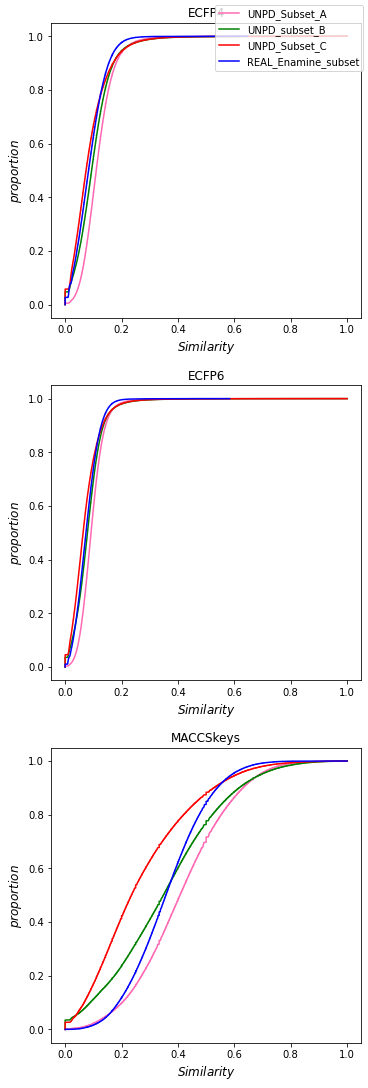

In [ ]:
# plot the sorted data:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,  constrained_layout=True)
fig.set_size_inches(5,15)
#ax1 = fig.add_subplot(121)
ax1.plot(SimMatECFP4_subset_a_sorted, proportionECFP_A, label="UNPD_Subset_A", c="hotpink")
ax1.plot(SimMatECFP4_subset_b_sorted, proportionECFP_B, label="UNPD_subset_B", c="green")
ax1.plot(SimMatECFP4_subset_c_sorted, proportionECFP_C, label="UNPD_Subset_C", c="red")
ax1.plot(SimMatECFP4_REAL_sorted, proportionECFP_REAL, label="REAL_Enamine_subset", c="blue")
ax1.set_xlabel('$Similarity$', fontsize=12)
ax1.set_ylabel('$proportion$', fontsize=12)
ax1.set_title('ECFP4', fontsize=12)
#fig.legend()

#ax2 = fig.add_subplot(122)
ax2.plot(SimMatECFP6_subset_a_sorted, proportionECFP_A, c="hotpink") #, label="UNPD_Subset_A")
ax2.plot(SimMatECFP6_subset_b_sorted, proportionECFP_B, c="green") #, label="UNPD_subset_B")
ax2.plot(SimMatECFP6_subset_c_sorted, proportionECFP_C, c="red") #, label="UNPD_subset_B")
ax2.plot(SimMatECFP6_REAL_sorted, proportionECFP_REAL, c="blue") #, label="REAL_Enamine_subset")
ax2.set_xlabel('$Similarity$', fontsize=12)
ax2.set_ylabel('$proportion$', fontsize=12)
ax2.set_title('ECFP6', fontsize=12)

#ax3 = fig.add_subplot(333)
ax3.plot(SimMatMACCSkeys_subset_a_sorted, proportionMACCSkeys_A, c="hotpink") #, label="UNPD_Subset_A")
ax3.plot(SimMatMACCSkeys_subset_b_sorted, proportionMACCSkeys_B, c="green") #, label="UNPD_subset_B")
ax3.plot(SimMatMACCSkeys_subset_c_sorted, proportionMACCSkeys_C, c="red") #, label="UNPD_subset_B")
ax3.plot(SimMatMACCSkeys_REAL_sorted, proportionMACCSkeys_REAL, c="blue") #, label="UNPD_subset_B")
ax3.set_xlabel('$Similarity$',fontsize=12)
ax3.set_ylabel('$proportion$', fontsize=12)
ax3.set_title('MACCSkeys', fontsize=12)

#fig.legend()
fig.legend(loc='best', fontsize=10)
#fig.legend(fontsize=10)

# Guardar figura
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
plt.savefig("/content/drive/MyDrive/HANNA_molecular_fingerprint/Natural products subsets/Comulative distribution function_prueba.jpg")

In [ ]:
from pandas.plotting import table
#create data
df = pd.DataFrame(np.random.randn(20, 2), columns=['First', 'Second'])

#create table
table = ax3.table(cellText=df.values, colLabels=df.columns, loc='center')

# **Comulative distribution function** [LINK](https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python)

---



NameError: ignored

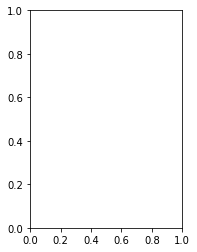

In [ ]:
# plot the sorted data:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(proportion_a, SimMat_subset_a_sorted)
ax1.set_xlabel('$proportion$')
ax1.set_ylabel('$SimMat$')

In [ ]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [10,20,30,40,50]
y = [30,30,30,30,30]

# plot lines
plt.plot(x, y, label = "line 1")
plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()

In [ ]:
plt.plot(SimMat_subset_a_sorted, proportion_a, label="a")
plt.legend()

In [ ]:
# plot the sorted data:
fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(122)
ax1.plot(SimMat_subset_a_sorted, proportion_a, label="a")
ax1.plot(SimMat_subset_b_sorted, proportion_b, label="b")
ax1.set_xlabel('$SimMatECFP$')
ax1.set_ylabel('$proportion$')
ax1.set_title('ECFP4')
#ax1.legend()

ax2 = fig.add_subplot(121)
ax2.plot(SimMat_subset_a_sorted, proportion_a) #, label="a")
ax2.plot(SimMat_subset_b_sorted, proportion_b) #, label="b")
ax2.set_xlabel('$SimMatECFP$')
ax2.set_ylabel('$proportion$')
ax2.set_title('MACCS keys')

#fig.legend()
fig.legend(loc='best', fontsize=10)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create some randomly ddistributed data:
data = np.random.randn(10000)

# sort the data:
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1. * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, data_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python